Initalizing nu density look up table... Done


  0%|          | 0/1385 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

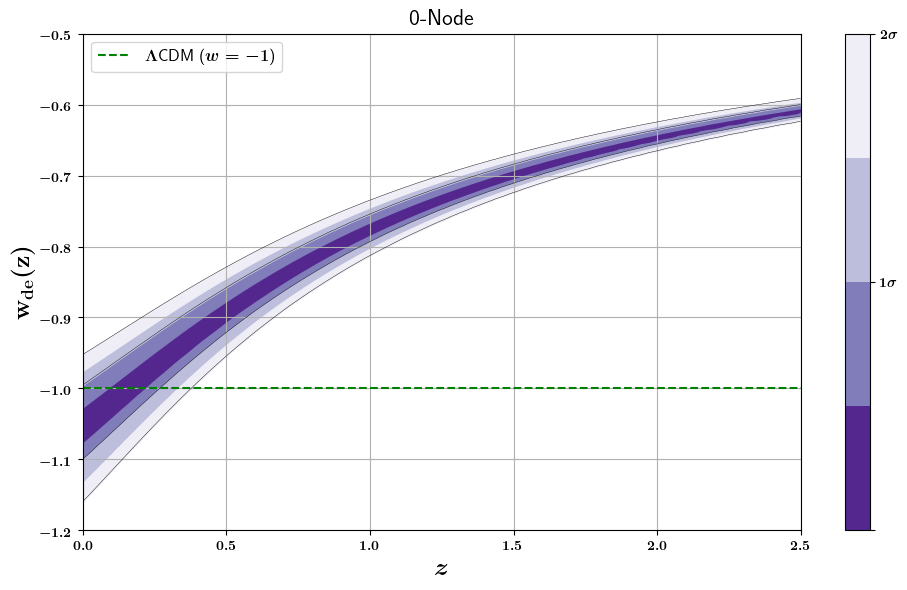

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import odeint
from simplemc.models.HolographicCosmology import HolographicCosmology
from fgivenx import plot_contours, samples_from_getdist_chains  # Added missing import


# Set up LaTeX for text rendering
plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r'\boldmath'





# Initialize the 0-node cosmology model
T = HolographicCosmology(mean=-2.0, nodes=0, interp='lineal')

# Define the function to compute the EoS for the 0-node case
def EoS_0node(z, theta):
    Om0 = theta[0]
    h = theta[1]
    c_value = theta[2]
    Ode0 = 1 - Om0  # Assuming flat universe (Ok = 0)

    T.Om = Om0
    T.h = h
    T.c_par.setValue(c_value)
    T.updateParams([T.c_par])
    # Compute the EoS values
    eos_values = [T.EoS(zi) for zi in z]
    return eos_values

# Get redshift values from the cosmology model
z = T.zvals

# Load samples from GetDist chains
file_root = '/Users/alfonsozapata/Documents/Union_chains/all_chains/'
file_root += 'SplGen0_phy_Union3+DESI+RiessH0_21_nested_multi'

# Load the chains with proper error handling
try:
    samples_zero, weights_zero = samples_from_getdist_chains(['Om', 'h', 'c'], file_root, settings={'ignore_rows': 0.3})
except Exception as e:
    raise RuntimeError(f"Failed to load chains from {file_root}. Error: {str(e)}")

# Plot contours for the 0-node case
plt.figure(figsize=(10, 6))
cbar1 = plot_contours(EoS_0node, z, samples_zero, weights=weights_zero, 
                     contour_line_levels=[1, 2], colors=plt.cm.Purples_r)
cbar1 = plt.colorbar(cbar1, ticks=[0, 1, 2])
cbar1.set_ticklabels(['', r'$1\sigma$', r'$2\sigma$'])

# Add labels and title
plt.ylabel(r'$\rm w_{de}(z)$', fontsize=18)
plt.xlabel(r'$z$', fontsize=18)
plt.title('0-Node', fontsize=16)
plt.ylim(-1.2,-0.5)

# Add ΛCDM reference line
lcdm = np.full(len(z), -1.0)
plt.plot(z, lcdm, linestyle='--', color='green', label=r'$\Lambda$CDM ($w=-1$)')
plt.legend(fontsize=12,loc = 'upper left')
plt.grid()
# Adjust layout and show plot
plt.tight_layout()
#plt.savefig("/home/alfonsozapata/Documents/allchains_nodal_union/plots/eos_0node_union.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
!which python 

In [ ]:
!python --version

In [ ]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from fgivenx import plot_contours, samples_from_getdist_chains
from matplotlib import rc

# Set up LaTeX for text rendering
plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r'\boldmath'


#samplesb, weightsb = samples_from_getdist_chains(['Om', 'h', 'c'], file_root, settings={'ignore_rows': 0.3})

# Define the function to compute H(z)/(1+z) for the 0-node case
def H_z2_0node(z, theta):
    Om0 = theta[0]
    h = theta[1]
    c_value = theta[2]
    Ode0 = 1 - Om0  # Assuming flat universe (Ok = 0)

    # Initialize the 0-node cosmology model
    T = SplineGHDECosmology(mean=-2.0, nodes=0, interp='lineal')
    T.Om = Om0
    T.h = h
    T.c_par.setValue(c_value)
    T.updateParams([T.c_par])

    # Compute H(z) and H(z)/(1+z)
    H_z = [T.RHSquared_a(1 / (1 + zi)) ** 0.5 * 100 * h for zi in z]
    H_z2 = [H_zi / (1 + zi) for H_zi, zi in zip(H_z, z)]
    z = T.zvals
    return H_z2

# Define redshift range


# Plot contours for H(z)/(1+z)
cbar = plot_contours(H_z2_0node, z, samples_zero, weights=weights_zero, contour_line_levels=[1, 2], colors=plt.cm.Purples_r)
#cbar = plt.colorbar(cbar, ticks=[0, 1, 2])
#cbar.set_ticklabels(['', r'$1\sigma$', r'$2\sigma$'])


# Add DESI-BAO data points
rd_fid_DESI = 147.09
zLRG1 = 0.510
zLRG2 = 0.706
zLRG3ELG1 = 0.930
zELG2 = 1.317
zLyaC = 2.330   

fact = (300000. / rd_fid_DESI)
colorbao = 'orangered'

def ersys(x, y):
    return np.sqrt(x**2 + y**2)

# BAO data points
plt.errorbar(zLRG1, fact / 20.98 / (1 + zLRG1), yerr=0.61* fact / (1 + zLRG1) / 20.98**2,
             color=colorbao, fmt='s', markersize=6, elinewidth=1.5)

plt.errorbar(zLRG2, fact / 20.08 / (1 + zLRG2), yerr=0.60* fact / (1 + zLRG2) / 20.08**2,
             color=colorbao, fmt='s', markersize=6, elinewidth=1.5)

plt.errorbar(zLRG3ELG1, fact / 17.88 / (1 + zLRG3ELG1), yerr=0.35* fact / (1 + zLRG3ELG1) / 17.88**2,
             color=colorbao, fmt='s', markersize=6, elinewidth=1.5)

plt.errorbar(zLyaC, fact / 8.52 / (1 + zLyaC), yerr=0.17 * fact / (1 + zLyaC) / 8.52**2,
             color=colorbao, fmt='s', markersize=6, elinewidth=1.5, label='BAO Data')
plt.errorbar(zELG2, fact / 13.82 / (1 + zELG2), yerr=0.42 * fact / (1 + zELG2) / 13.82**2,
             color=colorbao, fmt='s', markersize=6, elinewidth=1.5)
plt.errorbar(0.001, 73.04, yerr=1.04,
             color='darkorange', fmt='s', markersize=6, elinewidth=3.0,label='SH0ES')



# Add labels and title
plt.xscale('linear')
plt.xlim(0.0, 2.5)
plt.ylabel(r'$H(z)/(1+z)$', fontsize=18)
plt.xlabel(r'$z$', fontsize=18)
plt.title('0-Node', fontsize=16)
plt.grid()
plt.legend(fontsize=12,loc = 'upper left')

# Save or show the plot
plt.tight_layout()
plt.savefig("/home/alfonsozapata/Documents/allchains_nodal_union/plots/Hz_0node_union.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
!python --version 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import odeint
from simplemc.models.SplineGHDECosmology import SplineGHDECosmology
from fgivenx import plot_contours, samples_from_getdist_chains

# Set up LaTeX for text rendering
plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r'\boldmath'

# Initialize cosmology model
T = SplineGHDECosmology(mean=-2.0, nodes=1, interp='lineal')

def EoS_1node(z, theta):
    """Compute equation of state for given parameters."""
    Om0 = theta[0]
    h = theta[1]
    c_value = theta[2]
    node_value = theta[3]
    Ode0 = 1 - Om0  # Assuming flat universe (Ok = 0)

    # Set parameters and update
    T.Om = Om0
    T.h = h
    T.c_par.setValue(c_value)
    T.updateParams([T.c_par])
    
    node_value = theta[3]  # Changed index to 3 to match parameter order
    T.params[0].setValue(node_value)
    T.updateParams([T.params[0]])

    # Compute the EoS values with error handling
    eos_values = []
    for zi in z:
        try:
            w = T.EoS(zi)
            if not np.isfinite(w):
                w = np.nan
            eos_values.append(w)
        except:
            eos_values.append(np.nan)
    
    return np.array(eos_values)

# Load samples from GetDist chains
file_root = '/home/alfonsozapata/Documents/allchains_nodal_union/'
file_root += 'SplGen1_phy_HD23+Union3+DESI+RiessH0_21_nested_multi'

# Load samples with proper filtering
samples_one, weights_one = samples_from_getdist_chains(
    ['Om', 'h', 'c', 'amp_0'], 
    file_root, 
    settings={'ignore_rows': 0.0}
)

# Filter out samples with NaN or inf values
valid_indices = np.all(np.isfinite(samples_one), axis=1)
samples_one = samples_one[valid_indices]
weights_one = weights_one[valid_indices]

# Get redshift values
z = T.zvals

# Plot contours with error handling
try:
    # Plot contours for the 1-node case
    cbar1 = plot_contours(
        EoS_1node, 
        z, 
        samples_one, 
        weights=weights_one, 
        contour_line_levels=[1, 2], 
        colors=plt.cm.Blues_r,
        parallel=False  # Try without parallel processing if issues persist
    )
    
    # Customize colorbar
    cbar1 = plt.colorbar(cbar1, ticks=[0, 1, 2])
    cbar1.set_ticklabels(['', r'$1\sigma$', r'$2\sigma$'])
    
    # Add labels and title
    plt.ylabel(r'$\rm w_{de}(z)$', fontsize=18)
    plt.xlabel(r'$z$', fontsize=18)
    plt.title('1-Node', fontsize=16)
    plt.ylim(-2, 0)
    
    # Add a horizontal line for LCDM (w = -1)
    plt.plot(z, np.full_like(z, -1.0), linestyle='--', color='darkred', label=r'$\Lambda$CDM ($w=-1$)')
    
    # Add grid and legend
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12, loc='upper left')
    
    # Save the plot
    plt.savefig(
        "/home/alfonsozapata/Documents/allchains_nodal_union/plots/eos_1node_union.pdf", 
        dpi=300, 
        bbox_inches='tight',
        transparent=True
    )
    plt.close()
    
except Exception as e:
    print(f"Error during plotting: {str(e)}")
    # Additional debugging info
    print(f"Number of valid samples: {len(samples_one)}")
    print(f"Sample statistics: {np.nanmean(samples_one, axis=0)}")



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from fgivenx import plot_contours, samples_from_getdist_chains
from matplotlib import rc

# Set up LaTeX for text rendering
plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r'\boldmath'

# Load samples and weights
#samplesb, weightsb = samples_from_getdist_chains(['Om', 'h', 'amp_0'], file_root, settings={'ignore_rows': 0.3})

# Define the function to compute H(z)/(1+z) for the 1-node case
def H_z2_1node(z, theta):
    Om0 = theta[0]
    h = theta[1]
    c_value = [2]
    node_value = theta[3]
    
    Ode0 = 1 - Om0  # Assuming flat universe (Ok = 0)

    T.Om = Om0
    T.h = h

    # Set the node value (example: use the first parameter as the node value)
    T.params[0].setValue(node_value)
    T.updateParams([T.params[0]])

    
    
    
    H_z = [T.RHSquared_a(1 / (1 + zi)) ** 0.5 * 100 * h for zi in z]
    H_z2 = [H_zi / (1 + zi) for H_zi, zi in zip(H_z, z)]
    return H_z2




# Plot contours for H(z)/(1+z)
cbar = plot_contours(H_z2_1node, z, samples_one, weights=weights_one, contour_line_levels=[1, 2], colors=plt.cm.Blues_r)
#cbar = plt.colorbar(cbar, ticks=[0, 1, 2])
#cbar.set_ticklabels(['', r'$1\sigma$', r'$2\sigma$'])

# Add DESI-BAO data points
rd_fid_DESI = 147.09
zLRG1 = 0.510
zLRG2 = 0.706
zLRG3ELG1 = 0.930
zELG2 = 1.317
zLyaC = 2.330   

fact = (300000. / rd_fid_DESI)
colorbao = 'darkred'

def ersys(x, y):
    return np.sqrt(x**2 + y**2)

# BAO data points
plt.errorbar(zLRG1, fact / 20.98 / (1 + zLRG1), yerr=0.61* fact / (1 + zLRG1) / 20.98**2,
             color=colorbao, fmt='s', markersize=6, elinewidth=1.5)

plt.errorbar(zLRG2, fact / 20.08 / (1 + zLRG2), yerr=0.60* fact / (1 + zLRG2) / 20.08**2,
             color=colorbao, fmt='s', markersize=6, elinewidth=1.5)

plt.errorbar(zLRG3ELG1, fact / 17.88 / (1 + zLRG3ELG1), yerr=0.35* fact / (1 + zLRG3ELG1) / 17.88**2,
             color=colorbao, fmt='s', markersize=6, elinewidth=1.5)

plt.errorbar(zLyaC, fact / 8.52 / (1 + zLyaC), yerr=0.17 * fact / (1 + zLyaC) / 8.52**2,
             color=colorbao, fmt='s', markersize=6, elinewidth=1.5, label='BAO Data')
plt.errorbar(zELG2, fact / 13.82 / (1 + zELG2), yerr=0.42 * fact / (1 + zELG2) / 13.82**2,
             color=colorbao, fmt='s', markersize=6, elinewidth=1.5)
plt.errorbar(0.001, 73.04, yerr=1.04,
             color='darkorange', fmt='s', markersize=6, elinewidth=2.5,label='SH0ES')



#plt.errorbar(zCombBAO1, 81.21 / (1 + zCombBAO1), yerr=ersys(2.17, 0.97) / (1 + zCombBAO1),
#             color=colorbao, fmt='d', markersize=6, elinewidth=1.5)
#plt.errorbar(zCombBAO2, 90.90 / (1 + zCombBAO2), yerr=ersys(2.07, 1.08) / (1 + zCombBAO2),
#             color=colorbao, fmt='d', markersize=6, elinewidth=1.5)
#plt.errorbar(zCombBAO3, 98.96 / (1 + zCombBAO3), yerr=ersys(2.21, 1.18) / (1 + zCombBAO3),
#             color=colorbao, fmt='d', markersize=6, elinewidth=1.5)
#plt.errorbar(0.01, 69.8, yerr=0.8, color=colorbao, fmt='d', markersize=6, elinewidth=1.5)

# Add labels and title
plt.xscale('linear')
plt.xlim(0.0, 2.5)
plt.ylabel(r'$H(z)/(1+z)$', fontsize=18)
plt.xlabel(r'$z$', fontsize=18)
plt.title('1-Node', fontsize=16)
plt.grid()
plt.legend(fontsize=12,loc = 'upper left')

# Save or show the plot
plt.tight_layout()
plt.savefig("/home/alfonsozapata/Documents/allchains_nodal_union/plots/Hz_1node_union.pdf", dpi=300, bbox_inches='tight')
plt.show()

  0%|          | 0/9933 [00:00<?, ?it/s]

/Users/alfonsozapata/Documents/SimpleMC/simplemc/models/HolographicCosmology.py:131: RuntimeWarning: invalid value encountered in sqrt
  fact += -1*func*np.sqrt(Ode)/self.c_hde*ex_term**(0.5 + 1./func)
/Users/alfonsozapata/Documents/SimpleMC/simplemc/models/HolographicCosmology.py:131: RuntimeWarning: invalid value encountered in power
  fact += -1*func*np.sqrt(Ode)/self.c_hde*ex_term**(0.5 + 1./func)
/Users/alfonsozapata/Documents/SimpleMC/simplemc/models/HolographicCosmology.py:135: RuntimeWarning: invalid value encountered in log
  fact += (1+z)/func*self.dffunc(z)*np.log(ex_term)
/Users/alfonsozapata/Documents/SimpleMC/simplemc/models/HolographicCosmology.py:173: RuntimeWarning: invalid value encountered in sqrt
  fact += -1*func*np.sqrt(Ode)/self.c_hde*ex_term**(0.5 + 1./func)
/Users/alfonsozapata/Documents/SimpleMC/simplemc/models/HolographicCosmology.py:173: RuntimeWarning: invalid value encountered in scalar power
  fact += -1*func*np.sqrt(Ode)/self.c_hde*ex_term**(0.5 + 1./fun

  0%|          | 0/100 [00:00<?, ?it/s]

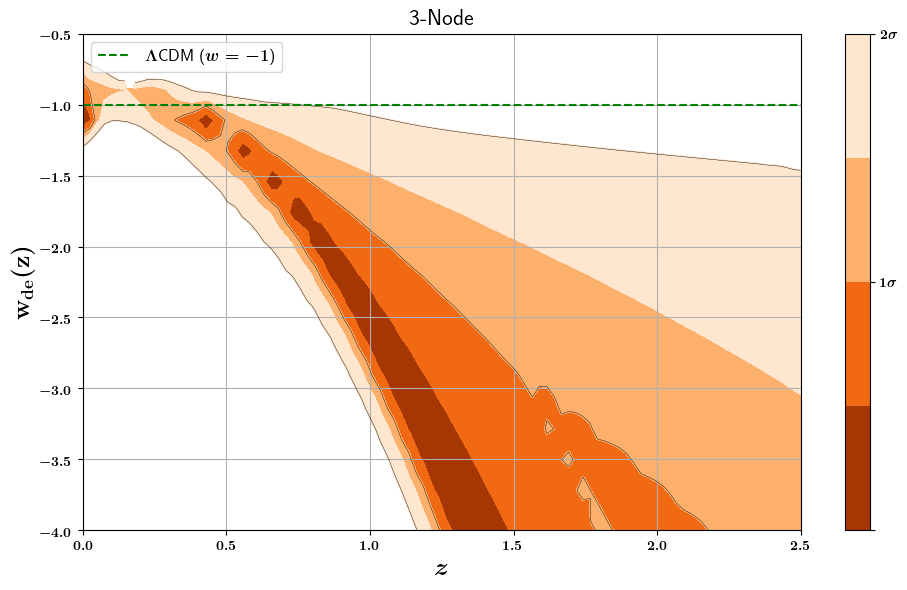

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import odeint
from simplemc.models.HolographicCosmology import HolographicCosmology
from fgivenx import plot_contours, samples_from_getdist_chains  # Added missing import

# Set up LaTeX for text rendering
plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r'\boldmath'



# Initialize the 0-node cosmology model
T = HolographicCosmology(mean=-2.0, nodes=3, interp='cubic')

# Define the function to compute the EoS for the 0-node case
def EoS_3node(z, theta):
    Om0 = theta[0]
    h = theta[1]
    c_value = theta[2]
    param0 = theta[3]
    param1 = theta[4]
    param2 = theta[5]
    Ode0 = 1 - Om0  # Assuming flat universe (Ok = 0)

    T.Om = Om0
    T.h = h

    T.c_par.setValue(c_value)
    T.updateParams([T.c_par])
    T.params[0].setValue(param0)
    T.updateParams([T.params[0]])

    T.params[1].setValue(param1)
    T.updateParams([T.params[1]])

    T.params[2].setValue(param2)
    T.updateParams([T.params[2]])

    # Compute the EoS values
    eos_values = [T.EoS(zi) for zi in z]
    return eos_values

# Get redshift values from the cosmology model
z = T.zvals

# Load samples from GetDist chains
file_root = "/Users/alfonsozapata/Documents/pantheon/"
file_root += 'SplGen3_phy_PantheonPlus+DESI+RiessH0_21_nested_multi'

# Load the chains with proper error handling
try:
    samples_zero, weights_zero = samples_from_getdist_chains(['Om', 'h', 'c',"amp_0","amp_1","amp_2"], file_root, settings={'ignore_rows': 0.3})
except Exception as e:
    raise RuntimeError(f"Failed to load chains from {file_root}. Error: {str(e)}")

# Plot contours for the 0-node case
plt.figure(figsize=(10, 6))
cbar1 = plot_contours(EoS_3node, z, samples_zero, weights=weights_zero, 
                     contour_line_levels=[1, 2], colors=plt.cm.Oranges_r)
cbar1 = plt.colorbar(cbar1, ticks=[0, 1, 2])
cbar1.set_ticklabels(['', r'$1\sigma$', r'$2\sigma$'])

# Add labels and title
plt.ylabel(r'$\rm w_{de}(z)$', fontsize=18)
plt.xlabel(r'$z$', fontsize=18)
plt.title('3-Node', fontsize=16)
plt.ylim(-4.0,-0.5)


# Add ΛCDM reference line
lcdm = np.full(len(z), -1.0)
plt.plot(z, lcdm, linestyle='--', color='green', label=r'$\Lambda$CDM ($w=-1$)')
plt.legend(fontsize=12,loc = 'upper left')
plt.grid()
# Adjust layout and show plot
plt.tight_layout()
plt.savefig("/Users/alfonsozapata/Documents/pantheon/plots/eos3_PP.pdf", dpi=300, bbox_inches='tight')
plt.show()

  0%|          | 0/9933 [00:00<?, ?it/s]

/Users/alfonsozapata/Documents/SimpleMC/simplemc/models/HolographicCosmology.py:131: RuntimeWarning: invalid value encountered in sqrt
  fact += -1*func*np.sqrt(Ode)/self.c_hde*ex_term**(0.5 + 1./func)
/Users/alfonsozapata/Documents/SimpleMC/simplemc/models/HolographicCosmology.py:131: RuntimeWarning: invalid value encountered in power
  fact += -1*func*np.sqrt(Ode)/self.c_hde*ex_term**(0.5 + 1./func)
/Users/alfonsozapata/Documents/SimpleMC/simplemc/models/HolographicCosmology.py:135: RuntimeWarning: invalid value encountered in log
  fact += (1+z)/func*self.dffunc(z)*np.log(ex_term)
/Users/alfonsozapata/Documents/SimpleMC/simplemc/models/HolographicCosmology.py:131: RuntimeWarning: overflow encountered in power
  fact += -1*func*np.sqrt(Ode)/self.c_hde*ex_term**(0.5 + 1./func)


  0%|          | 0/100 [00:00<?, ?it/s]

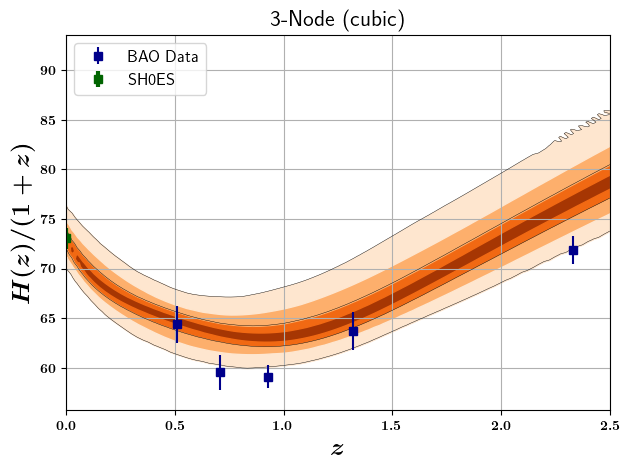

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from fgivenx import plot_contours, samples_from_getdist_chains
from matplotlib import rc

# Set up LaTeX for text rendering
plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r'\boldmath'

T = HolographicCosmology(mean=-2.0, nodes=3, interp='cubic')
#samplesb, weightsb = samples_from_getdist_chains(['Om', 'h', 'c'], file_root, settings={'ignore_rows': 0.3})

# Define the function to compute H(z)/(1+z) for the 0-node case
def H_z2_3node(z, theta):
    
    Om0 = theta[0]
    h = theta[1]
    c_value = theta[2]
    param0 = theta[3]
    param1 = theta[4]
    param2 = theta[5]
    Ode0 = 1 - Om0  # Assuming flat universe (Ok = 0)

    T.Om = Om0
    T.h = h

    T.c_par.setValue(c_value)
    T.updateParams([T.c_par])
    T.params[0].setValue(param0)
    T.updateParams([T.params[0]])

    T.params[1].setValue(param1)
    T.updateParams([T.params[1]])

    T.params[2].setValue(param2)
    T.updateParams([T.params[2]])
    Ode0 = 1 - Om0  # Assuming flat universe (Ok = 0)

    # Initialize the 0-node cosmology model
    

    T.Om = Om0
    T.h = h
    T.c_par.setValue(c_value)
    T.updateParams([T.c_par])

    # Compute H(z) and H(z)/(1+z)
    H_z = [T.RHSquared_a(1 / (1 + zi)) ** 0.5 * 100 * h for zi in z]
    H_z2 = [H_zi / (1 + zi) for H_zi, zi in zip(H_z, z)]
    z = T.zvals
    return H_z2

# Define redshift range


# Plot contours for H(z)/(1+z)
cbar = plot_contours(H_z2_3node, z, samples_zero, weights=weights_zero, contour_line_levels=[1, 2], colors=plt.cm.Oranges_r)
#cbar = plt.colorbar(cbar, ticks=[0, 1, 2])
#cbar.set_ticklabels(['', r'$1\sigma$', r'$2\sigma$'])


# Add DESI-BAO data points
rd_fid_DESI = 147.09
zLRG1 = 0.510
zLRG2 = 0.706
zLRG3ELG1 = 0.930
zELG2 = 1.317
zLyaC = 2.330   

fact = (300000. / rd_fid_DESI)
colorbao = 'darkblue'

def ersys(x, y):
    return np.sqrt(x**2 + y**2)

# BAO data points
plt.errorbar(zLRG1, fact / 20.98 / (1 + zLRG1), yerr=0.61* fact / (1 + zLRG1) / 20.98**2,
             color=colorbao, fmt='s', markersize=6, elinewidth=1.5)

plt.errorbar(zLRG2, fact / 20.08 / (1 + zLRG2), yerr=0.60* fact / (1 + zLRG2) / 20.08**2,
             color=colorbao, fmt='s', markersize=6, elinewidth=1.5)

plt.errorbar(zLRG3ELG1, fact / 17.88 / (1 + zLRG3ELG1), yerr=0.35* fact / (1 + zLRG3ELG1) / 17.88**2,
             color=colorbao, fmt='s', markersize=6, elinewidth=1.5)

plt.errorbar(zLyaC, fact / 8.52 / (1 + zLyaC), yerr=0.17 * fact / (1 + zLyaC) / 8.52**2,
             color=colorbao, fmt='s', markersize=6, elinewidth=1.5, label='BAO Data')
plt.errorbar(zELG2, fact / 13.82 / (1 + zELG2), yerr=0.42 * fact / (1 + zELG2) / 13.82**2,
             color=colorbao, fmt='s', markersize=6, elinewidth=1.5)
plt.errorbar(0.001, 73.04, yerr=1.04,
             color='darkgreen', fmt='s', markersize=6, elinewidth=3.0,label='SH0ES')



# Add labels and title
plt.xscale('linear')
plt.xlim(0.0, 2.5)
plt.ylabel(r'$H(z)/(1+z)$', fontsize=18)
plt.xlabel(r'$z$', fontsize=18)
plt.title('3-Node (cubic)', fontsize=16)
plt.grid()
plt.legend(fontsize=12,loc = 'upper left')

# Save or show the plot
plt.tight_layout()
#plt.savefig("/home/alfonsozapata/Documents/allchains_nodal_union/plots/Hz_0node_union.pdf", dpi=300, bbox_inches='tight')
plt.savefig("/Users/alfonsozapata/Documents/pantheon/plots/Hz2_3nodes_PP.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:

from simplemc.models.HolographicCosmology import HolographicCosmology
# Initialize the cosmology with 3 nodes and linear interpolation
T = HolographicCosmology(mean=-2.0, nodes=3, interp='lineal')

# Set the node values for the interpolation function
f_0 = -1.6
f_1 = -1.8
f_2 = -2.37
# Set the holographic parameter c
c_value = 1.13
# Update the parameters
T.c_par.setValue(c_value)
T.updateParams([T.c_par])
T.params[0].setValue(f_0)
T.updateParams([T.params[0]])
T.params[1].setValue(f_1)
T.updateParams([T.params[1]])
T.params[2].setValue(f_2)
T.updateParams([T.params[2]])
# Calculate the Equation of State (EoS) for each redshift
w = [T.EoS(zi) for zi in z]
print(w[0])
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(z, w, 'b-', linewidth=2, label='EoS(z)')
# Plot settings
plt.xlabel('z', fontsize=14)
plt.ylabel(' w(z)', fontsize=14)
# Add horizontal lines for reference values
plt.axhline(y=-1, color='r', linestyle='--', alpha=0.5, label='ΛCDM (w=-1)')
plt.axhline(y=-1/3, color='g', linestyle='--', alpha=0.5, label='Matter-domination limit')
# Show the plot
plt.tight_layout()
plt.show()